In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [2]:
# the regression models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [3]:
# metrics
from sklearn import metrics

# feature selection models
from sklearn.feature_selection import SelectFromModel

In [4]:
from sklearn import set_config
set_config(display='diagram')

In [5]:
df = pd.read_csv("Concrete_without_Outliers.csv")
df.head()

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,120.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,120.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,120.0,44.30


In [6]:
data = df.copy()

In [7]:
target  = 'Compressive_Strength'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=1
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

<IPython.core.display.Javascript object>

X_train shape: (703, 8)
X_test shape: (302, 8)
y_train shape: (703,)
y_test shape: (302,)


In [18]:
def train_test_model(model, method, of_type, index, scale):
    
    print(model)
    # define pipeline process
    if scale == 'yes':
        pipe = Pipeline([ 
            ('yeo-johnson', PowerTransformer()), 
            ('model', model)       
        ])
    elif scale == 'no':
        pipe = Pipeline([
            ('yeo-johnson', PowerTransformer(standardize=False),
            ('model', model))
        ])
    
    # fit the pipeline
    pipe.fit(X_train, y_train)
    
    # predict
    X_train_preds = pipe.predict(X_train)
    X_test_preds = pipe.predict(X_test)
    
    # model evaluation
    train_mse = metrics.mean_squared_error(y_train, X_train_preds)
    train_rmse = np.sqrt(train_mse)
    train_r2 = metrics.r2_score(y_train, X_train_preds)
    
    test_mse = metrics.mean_squared_error(y_test, X_test_preds)
    test_rmse = np.sqrt(test_mse)
    test_r2 = metrics.r2_score(y_test, X_test_preds)
    
    if of_type == 'coef':
        # Intercept and Coefficients
        print(f'The intercept for our model is {model.intercept_}')
        
        for idx, feature in enumerate(X_train.columns):
            print(f"The Coefficient for {feature} is {model.coef_.ravel()[idx]}")
        
        # Feature Importance Plots
        fig, ax = plt.subplots(figsize=(13,12))
        coef = pd.DataFrame(np.sort(model.coef_)[::-1].ravel())
        coef['feat'] = X_train.columns
        sns.barplot(x=coef['feat'], y=coef[0], palette='jet_r', linewidth=2, ax=ax)
        ax.set_xlabel('coefficients')
        ax.set_ylabel('features')
        fig.suptitle(f"{method} FEATURE IMPORTANCES")
    
    elif of_type == 'feat':
        fig, ax = plt.subplots(figsize=(13,12))
        coef = pd.DataFrame(np.sort(model.feature)[::-1].ravel())
        coef['feat'] = X_train.columns
        sns.barplot(x=coef['feat'], y=coef[0], palette='jet_r', linewidth=2, ax=ax)
        ax.set_xlabel('coefficients')
        ax.set_ylabel('features')
        fig.suptitle(f"{method} FEATURE IMPORTANCES")

    results_df = pd.DataFrame({
        'Method':method,
        "train_rmse":train_rmse,
        "train_r2":train_r2,
        "test_rmse":test_rmse,
        "test_r2":test_r2
    }, index=[index])
    return results_df

## Linear Regression

In [19]:
lr = LinearRegression()

In [20]:
results_df = train_test_model(lr, 'LinearRegression', 'none',1, 'yes')

LinearRegression()


In [21]:
results_df

,Method,train_rmse,train_r2,test_rmse,test_r2
1,LinearRegression,7.024448,0.812447,7.329756,0.800443


## Ridge Regression

Ridge(random_state=1)
The intercept for our model is 35.24401137980086
The Coefficient for Cement is 8.780059494564444
The Coefficient for Furnace_Slag is 4.9245537855198735
The Coefficient for Fly_Ash is 0.9056169110359562
The Coefficient for Water is -4.912308112430893
The Coefficient for Superplasticizer is 1.6445702370959043
The Coefficient for Coarse_Aggregate is -0.6411853776625848
The Coefficient for Fine_Aggregate is -2.096027312520767
The Coefficient for Age is 9.623765316601771


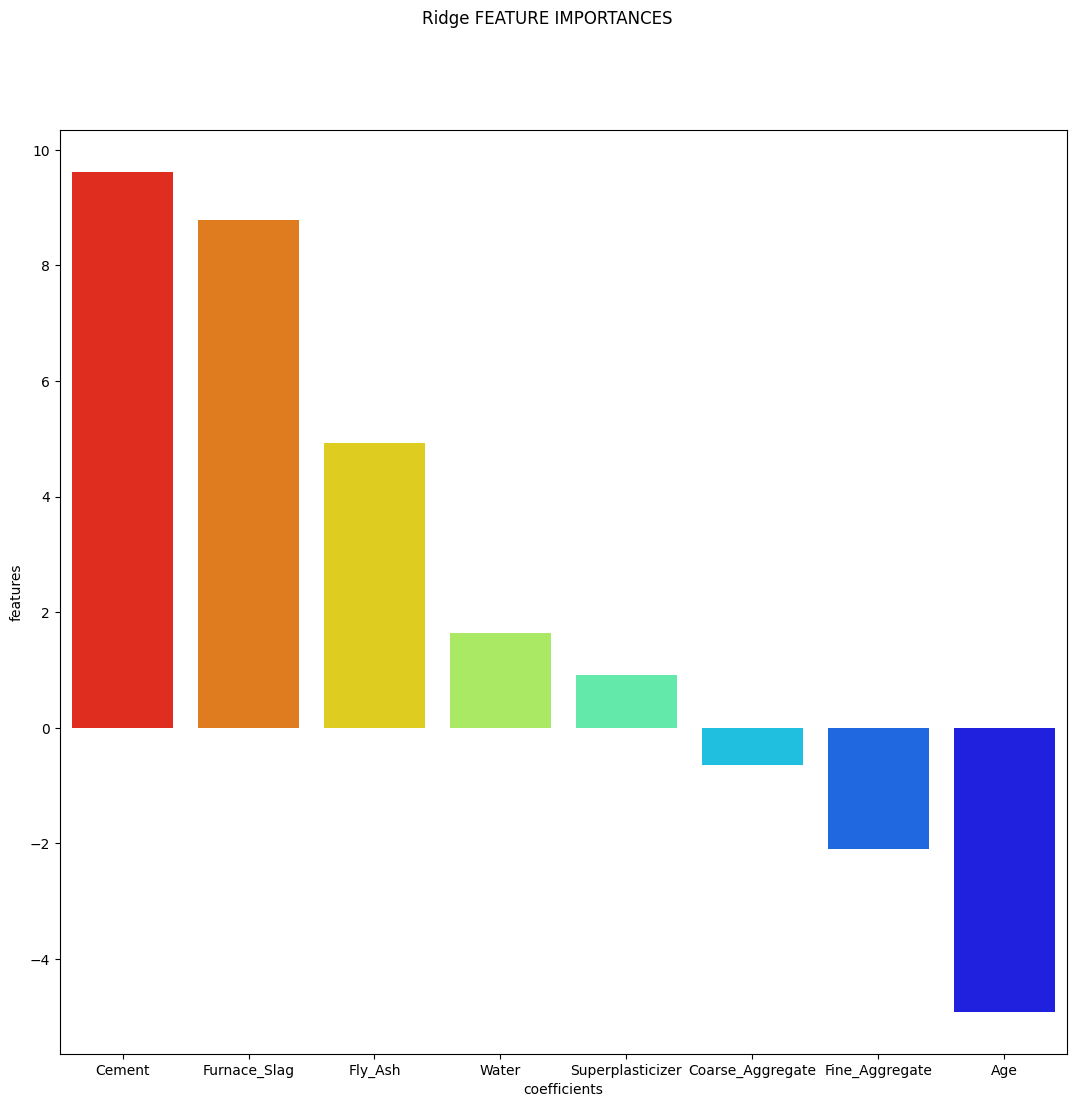

In [22]:
rr = Ridge(random_state=1)

ridge_results_df = train_test_model(rr, 'Ridge', 'coef', 2, 'yes')

In [23]:
results_df = pd.concat([results_df,ridge_results_df])

In [24]:
results_df

,Method,train_rmse,train_r2,test_rmse,test_r2
1,LinearRegression,7.024448,0.812447,7.329756,0.800443
2,Ridge,7.024504,0.812444,7.330135,0.800422


## Lasso

Lasso(random_state=1)
The intercept for our model is 35.24401137980086
The Coefficient for Cement is 7.625069874638087
The Coefficient for Furnace_Slag is 3.7625266124565044
The Coefficient for Fly_Ash is 0.0
The Coefficient for Water is -2.9656941464303257
The Coefficient for Superplasticizer is 2.492510145457824
The Coefficient for Coarse_Aggregate is -0.0
The Coefficient for Fine_Aggregate is -0.8230048292667232
The Coefficient for Age is 8.565120856869747


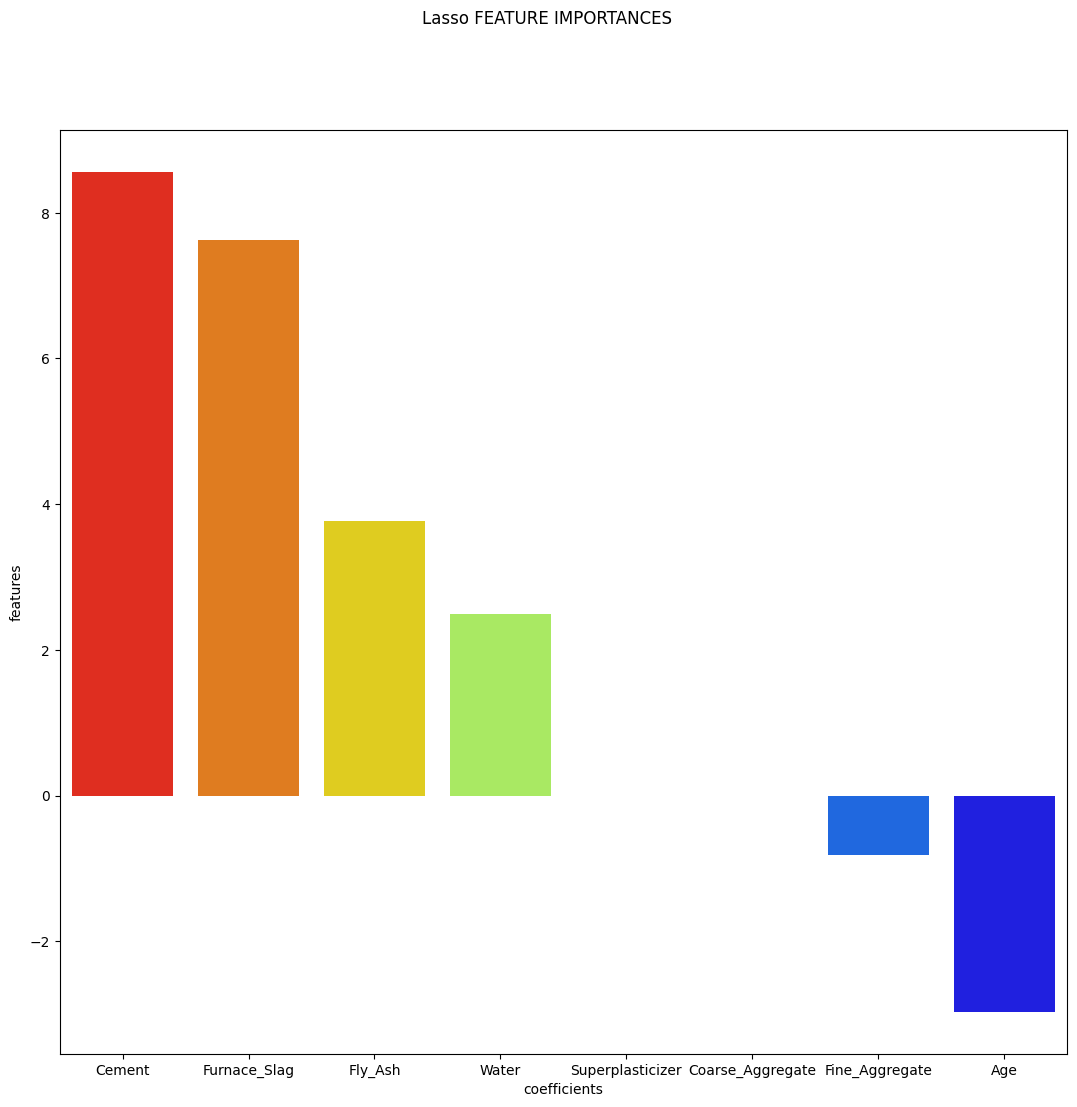

In [25]:
lasso = Lasso(random_state=1)

lasso_results_df = train_test_model(lasso, 'Lasso', 'coef', 3, 'yes')

In [16]:
results_df = pd.concat([results_df, lasso_results_df])
results_df

,Method,train_rmse,train_r2,test_rmse,test_r2
1,LinearRegression,7.024448,0.812447,7.329756,0.800443
2,Ridge,7.024504,0.812444,7.330135,0.800422
3,Lasso,7.459405,0.788501,7.708747,0.779273


## Polynomical Linear Regression